In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [4]:
data = pd.read_csv(r"C:\Users\user\Downloads\water.csv")

In [5]:
data

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413
...,...,...
74,1959,594
75,1960,587
76,1961,587
77,1962,625


In [6]:
data.head(2)

,Year,Water
0,1885,356
1,1886,386


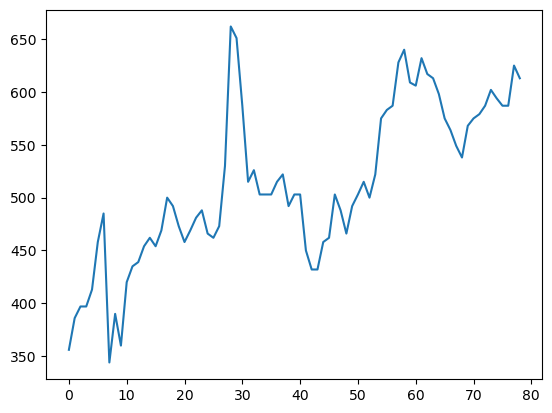

In [14]:
plt.plot(data['Water'])

(array([ 3.,  4.,  6., 13., 11., 14.,  3., 13.,  8.,  4.]),
 array([344. , 375.8, 407.6, 439.4, 471.2, 503. , 534.8, 566.6, 598.4,
        630.2, 662. ]),
 <BarContainer object of 10 artists>)

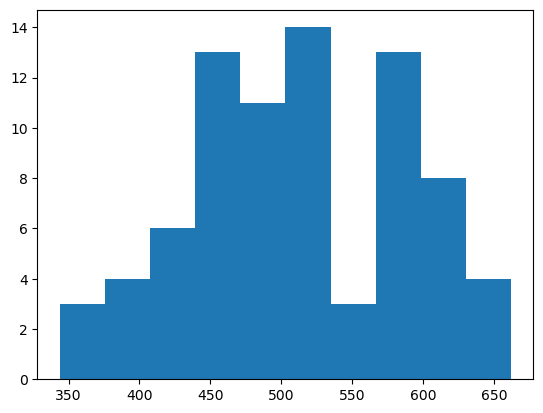

In [19]:
plt.hist(data['Water'])

C:\Users\user\AppData\Local\Temp\ipykernel_1836\4038680859.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['Water'])


<Axes: xlabel='Water', ylabel='Density'>

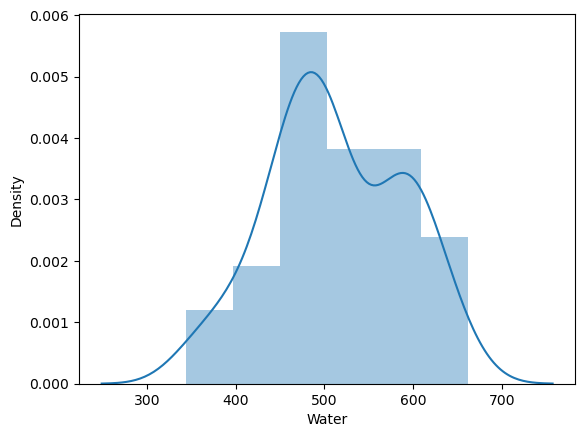

In [25]:
sn.distplot(data['Water'])

## Check for stationarity

In [26]:
result = adfuller(data['Water'])

In [27]:
p_value = result[1]
print("p_value:" , p_value)

p_value: 0.25382708879415783


In [31]:
statistics_value = result[0]
print("statistics_value:",statistics_value)

statistics_value: -2.077087450405189


In [39]:
train_data = data.drop(['Water'] , axis =1)
test_data = data['Water']

In [40]:
model_arima = ARIMA(train_data , order = (2 , 1 ,0))

In [43]:
 model_fit = model_arima.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [45]:
model_fit

In [47]:
forecast  = model_fit.forecast(steps = len(test_data))

In [48]:
forecast

79     1963.999808
80     1964.999614
81     1965.999230
82     1966.998841
83     1967.998266
          ...     
153    2037.721813
154    2038.714469
155    2039.706997
156    2040.699460
157    2041.691797
Name: predicted_mean, Length: 79, dtype: float64

In [49]:
data.head(10)

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413
5,1890,458
6,1891,485
7,1892,344
8,1893,390
9,1894,360


In [50]:
data.tail(10)

,Year,Water
69,1954,568
70,1955,575
71,1956,579
72,1957,587
73,1958,602
74,1959,594
75,1960,587
76,1961,587
77,1962,625
78,1963,613


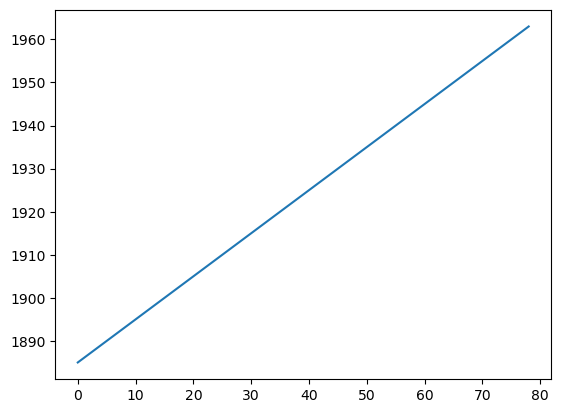

In [51]:
plt.plot(train_data , label = 'Training data')


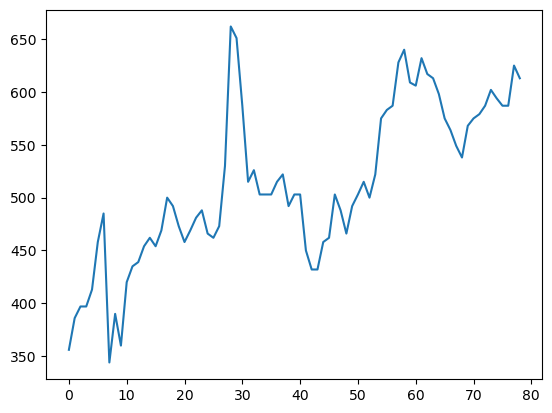

In [52]:
plt.plot(test_data , label = 'Actual Data')

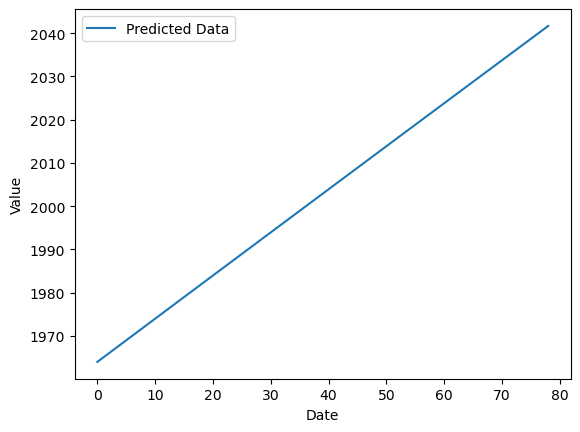

In [54]:
plt.plot(test_data.index , forecast, label = 'Predicted Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
